In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
assesdf = pd.read_csv('/content/assessments.csv')
assesdf

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229,0.0
202,GGG,2014J,37435,TMA,61,0.0
203,GGG,2014J,37436,TMA,124,0.0
204,GGG,2014J,37437,TMA,173,0.0


In [ ]:
assesdf.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [ ]:
assesdf.duplicated().sum()

0

In [ ]:
assesdf['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [ ]:
assesdf.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                  object
weight               float64
dtype: object

In [ ]:
assesdf['date'].unique()

array(['19', '54', '117', '166', '215', '?', '89', '124', '159', '187',
       '47', '96', '131', '208', '82', '152', '194', '12', '40', '110',
       '201', '18', '67', '137', '207', '32', '102', '151', '200', '144',
       '214', '109', '158', '23', '51', '79', '114', '149', '170', '206',
       '25', '53', '81', '116', '240', '88', '123', '165', '261', '74',
       '241', '20', '41', '62', '111', '146', '195', '33', '68', '235',
       '228', '222', '236', '173', '227', '24', '52', '87', '129', '171',
       '94', '136', '199', '229', '61'], dtype=object)

In [ ]:
assesdf['date'] = assesdf['date'].replace('?', 0)
assesdf['date'] = assesdf['date'].astype('int')

In [ ]:
assesdf['date'].unique()

array([ 19,  54, 117, 166, 215,   0,  89, 124, 159, 187,  47,  96, 131,
       208,  82, 152, 194,  12,  40, 110, 201,  18,  67, 137, 207,  32,
       102, 151, 200, 144, 214, 109, 158,  23,  51,  79, 114, 149, 170,
       206,  25,  53,  81, 116, 240,  88, 123, 165, 261,  74, 241,  20,
        41,  62, 111, 146, 195,  33,  68, 235, 228, 222, 236, 173, 227,
        24,  52,  87, 129, 171,  94, 136, 199, 229,  61])

In [ ]:
assesdf2 = assesdf.copy()
assesdf2

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229,0.0
202,GGG,2014J,37435,TMA,61,0.0
203,GGG,2014J,37436,TMA,124,0.0
204,GGG,2014J,37437,TMA,173,0.0


In [ ]:
assesdf['weight'].unique()

array([ 10. ,  20. ,  30. , 100. ,   1. ,   5. ,  18. ,   0. ,  35. ,
         2. ,   7. ,   8. ,   9. ,  22. ,   3. ,   4. ,   6. ,   7.5,
        12.5,  15. ,  17.5,  25. ,  16. ,  28. ])

In [ ]:
coursesDf = pd.read_csv('/content/courses.csv')
coursesDf

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [ ]:
coursesDf.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [ ]:
coursesDf.duplicated().sum()

0

In [ ]:
 coursesDf['module_presentation_length'].unique()

array([268, 269, 262, 240, 234, 241, 261])

In [ ]:
studentAssessmentDf = pd.read_csv('/content/studentAssessment.csv')
studentAssessmentDf

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79
...,...,...,...,...,...
173907,37443,527538,227,0,60
173908,37443,534672,229,0,100
173909,37443,546286,215,0,80
173910,37443,546724,230,0,100


In [ ]:
studentAssessmentDf.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [ ]:
studentAssessmentDf.duplicated().sum()

0

In [ ]:
studentInfoDf = pd.read_csv('/content/studentInfo.csv')
studentInfoDf

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [ ]:
studentInfoDf.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [ ]:
studentInfoDf.duplicated().sum()

0

In [ ]:
studentRegistrationDf = pd.read_csv('/content/studentRegistration.csv')
studentRegistrationDf

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4,?
32589,GGG,2014J,2645731,-23,?
32590,GGG,2014J,2648187,-129,?
32591,GGG,2014J,2679821,-49,101


In [ ]:
studentRegistrationDf.isnull().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

In [ ]:
studentRegistrationDf.duplicated().sum()

0

In [ ]:
studentRegistrationDf['date_unregistration'].unique()

array(['?', '12', '96', '72', '175', '135', '30', '144', '129', '58',
       '158', '191', '123', '60', '185', '166', '109', '170', '187',
       '177', '-121', '-3', '53', '65', '160', '51', '5', '202', '-100',
       '172', '119', '73', '128', '241', '23', '173', '203', '27', '37',
       '103', '-2', '240', '138', '163', '10', '178', '-19', '-50', '-80',
       '242', '220', '114', '219', '13', '199', '93', '39', '164', '235',
       '207', '143', '24', '234', '104', '201', '67', '-87', '229', '132',
       '-101', '-47', '165', '227', '18', '174', '-137', '-12', '80',
       '-22', '150', '-11', '-129', '9', '228', '180', '182', '213', '63',
       '32', '108', '110', '34', '55', '146', '-16', '-54', '38', '226',
       '-8', '153', '139', '59', '86', '-75', '42', '-4', '-59', '-225',
       '157', '68', '11', '76', '33', '25', '6', '-68', '-9', '-65',
       '-25', '-92', '-1', '-5', '208', '95', '48', '-82', '198', '22',
       '-117', '54', '-163', '57', '47', '81', '200', '136'

In [ ]:
studentRegistrationDf['date_unregistration'] = studentRegistrationDf['date_unregistration'].replace('?', 0)
studentRegistrationDf['date_unregistration'] = studentRegistrationDf['date_unregistration'].astype('int')
studentRegistrationDf

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,0
1,AAA,2013J,28400,-53,0
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,0
4,AAA,2013J,32885,-176,0
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4,0
32589,GGG,2014J,2645731,-23,0
32590,GGG,2014J,2648187,-129,0
32591,GGG,2014J,2679821,-49,101


In [ ]:
studentRegistrationDf['date_unregistration'].unique()

array([   0,   12,   96,   72,  175,  135,   30,  144,  129,   58,  158,
        191,  123,   60,  185,  166,  109,  170,  187,  177, -121,   -3,
         53,   65,  160,   51,    5,  202, -100,  172,  119,   73,  128,
        241,   23,  173,  203,   27,   37,  103,   -2,  240,  138,  163,
         10,  178,  -19,  -50,  -80,  242,  220,  114,  219,   13,  199,
         93,   39,  164,  235,  207,  143,   24,  234,  104,  201,   67,
        -87,  229,  132, -101,  -47,  165,  227,   18,  174, -137,  -12,
         80,  -22,  150,  -11, -129,    9,  228,  180,  182,  213,   63,
         32,  108,  110,   34,   55,  146,  -16,  -54,   38,  226,   -8,
        153,  139,   59,   86,  -75,   42,   -4,  -59, -225,  157,   68,
         11,   76,   33,   25,    6,  -68,   -9,  -65,  -25,  -92,   -1,
         -5,  208,   95,   48,  -82,  198,   22, -117,   54, -163,   57,
         47,   81,  200,  136,   83,   61,  -18,  137,  102,  -36,  152,
        100,  -73,  130,  -30,  121,  145,   66, -2

In [ ]:
merged_df = pd.merge(studentAssessmentDf, studentInfoDf, on='id_student' , how='left')
merged_df

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,1752,11391,18,0,78,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,1752,28400,22,0,70,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,1752,31604,17,0,72,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
3,1752,32885,26,0,69,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
4,1752,38053,19,0,79,AAA,2013J,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207314,37443,527538,227,0,60,GGG,2014J,F,Wales,A Level or Equivalent,20-30%,0-35,0,30,N,Distinction
207315,37443,534672,229,0,100,GGG,2014J,F,West Midlands Region,A Level or Equivalent,0-10%,35-55,0,30,N,Pass
207316,37443,546286,215,0,80,GGG,2014J,M,Yorkshire Region,A Level or Equivalent,0-10%,0-35,0,60,N,Distinction
207317,37443,546724,230,0,100,GGG,2014J,F,London Region,Lower Than A Level,50-60%,0-35,2,30,N,Pass


In [ ]:
merged_df.isnull().sum()

id_assessment           0
id_student              0
date_submitted          0
is_banked               0
score                   0
code_module             0
code_presentation       0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [ ]:
studentInfoDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [ ]:
studentAssessmentDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_assessment   173912 non-null  int64 
 1   id_student      173912 non-null  int64 
 2   date_submitted  173912 non-null  int64 
 3   is_banked       173912 non-null  int64 
 4   score           173912 non-null  object
dtypes: int64(4), object(1)
memory usage: 6.6+ MB


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207319 entries, 0 to 207318
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id_assessment         207319 non-null  int64 
 1   id_student            207319 non-null  int64 
 2   date_submitted        207319 non-null  int64 
 3   is_banked             207319 non-null  int64 
 4   score                 207319 non-null  object
 5   code_module           207319 non-null  object
 6   code_presentation     207319 non-null  object
 7   gender                207319 non-null  object
 8   region                207319 non-null  object
 9   highest_education     207319 non-null  object
 10  imd_band              207319 non-null  object
 11  age_band              207319 non-null  object
 12  num_of_prev_attempts  207319 non-null  int64 
 13  studied_credits       207319 non-null  int64 
 14  disability            207319 non-null  object
 15  final_result     

In [ ]:
merged_df2 = pd.merge(assesdf, studentAssessmentDf, on='id_assessment', how='left')
merged_df2

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19,10.0,11391.0,18.0,0.0,78
1,AAA,2013J,1752,TMA,19,10.0,28400.0,22.0,0.0,70
2,AAA,2013J,1752,TMA,19,10.0,31604.0,17.0,0.0,72
3,AAA,2013J,1752,TMA,19,10.0,32885.0,26.0,0.0,69
4,AAA,2013J,1752,TMA,19,10.0,38053.0,19.0,0.0,79
...,...,...,...,...,...,...,...,...,...,...
173925,GGG,2014J,37437,TMA,173,0.0,652539.0,176.0,0.0,75
173926,GGG,2014J,37437,TMA,173,0.0,653157.0,187.0,0.0,70
173927,GGG,2014J,37437,TMA,173,0.0,653252.0,171.0,0.0,70
173928,GGG,2014J,37437,TMA,173,0.0,653374.0,172.0,0.0,50


In [ ]:
merged_df2.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                  0
weight                0
id_student           18
date_submitted       18
is_banked            18
score                18
dtype: int64

In [ ]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173930 entries, 0 to 173929
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   code_module        173930 non-null  object 
 1   code_presentation  173930 non-null  object 
 2   id_assessment      173930 non-null  int64  
 3   assessment_type    173930 non-null  object 
 4   date               173930 non-null  int64  
 5   weight             173930 non-null  float64
 6   id_student         173912 non-null  float64
 7   date_submitted     173912 non-null  float64
 8   is_banked          173912 non-null  float64
 9   score              173912 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 14.6+ MB


In [ ]:
assesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    int64  
 5   weight             206 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 9.8+ KB


In [ ]:
merged_df3 = pd.merge(studentInfoDf, assesdf, how="left", on=['code_module', 'code_presentation'])
merged_df3

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,assessment_type,date,weight
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,TMA,19,10.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,TMA,54,20.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,TMA,117,20.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755,TMA,166,20.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756,TMA,215,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37443,CMA,229,0.0
323921,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37435,TMA,61,0.0
323922,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37436,TMA,124,0.0
323923,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37437,TMA,173,0.0


In [ ]:
merged_df3.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
id_assessment           0
assessment_type         0
date                    0
weight                  0
dtype: int64

In [ ]:
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323925 entries, 0 to 323924
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   code_module           323925 non-null  object 
 1   code_presentation     323925 non-null  object 
 2   id_student            323925 non-null  int64  
 3   gender                323925 non-null  object 
 4   region                323925 non-null  object 
 5   highest_education     323925 non-null  object 
 6   imd_band              323925 non-null  object 
 7   age_band              323925 non-null  object 
 8   num_of_prev_attempts  323925 non-null  int64  
 9   studied_credits       323925 non-null  int64  
 10  disability            323925 non-null  object 
 11  final_result          323925 non-null  object 
 12  id_assessment         323925 non-null  int64  
 13  assessment_type       323925 non-null  object 
 14  date                  323925 non-null  int64  
 15  

In [ ]:
merged_df['score'] = merged_df['score'].replace('?', 0)
merged_df['score'] = merged_df['score'].astype('int')

In [ ]:
merged_df['score'].unique()

array([ 78,  70,  72,  69,  79,  71,  68,  73,  67,  83,  66,  59,  82,
        60,  75,  74,  62,  63,  84,  80,  76,  85,  57,  81,  87,  77,
        45,  65,  61,  52,  54,  51,  88,  58,  64,  55,  38,  91,  47,
        89,  36,  86,  49,  53,  39,   0,  90,  50,  56,  30,  11,  40,
        94,  48,  46,  25,  34,  42,  18,  37,  28,  33,  95,  35,  44,
        41,  15,  43,  93,  32,  92,  98,  24,  19,  27,  29,  20,  97,
        23,  99, 100,  10,   5,  13,  26,  22,   8,  12,  16,   9,  96,
        14,  21,  17,  31,   6,   1,   7,   4,   2,   3])

In [ ]:
gb1=merged_df.groupby("final_result").agg({"score":'mean'})
print(gb1)

                  score
final_result           
Distinction   88.393554
Fail          64.792364
Pass          76.380691
Withdrawn     68.591977


In [ ]:
df_merge = pd.merge(assesdf,coursesDf)
df_merge

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length
0,AAA,2013J,1752,TMA,19,10.0,268
1,AAA,2013J,1753,TMA,54,20.0,268
2,AAA,2013J,1754,TMA,117,20.0,268
3,AAA,2013J,1755,TMA,166,20.0,268
4,AAA,2013J,1756,TMA,215,30.0,268
...,...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229,0.0,269
202,GGG,2014J,37435,TMA,61,0.0,269
203,GGG,2014J,37436,TMA,124,0.0,269
204,GGG,2014J,37437,TMA,173,0.0,269


In [ ]:
df_merge.isnull().sum()

code_module                   0
code_presentation             0
id_assessment                 0
assessment_type               0
date                          0
weight                        0
module_presentation_length    0
dtype: int64

In [ ]:
df_merge2 = pd.merge(df_merge,studentAssessmentDf)
df_merge2

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19,10.0,268,11391,18,0,78
1,AAA,2013J,1752,TMA,19,10.0,268,28400,22,0,70
2,AAA,2013J,1752,TMA,19,10.0,268,31604,17,0,72
3,AAA,2013J,1752,TMA,19,10.0,268,32885,26,0,69
4,AAA,2013J,1752,TMA,19,10.0,268,38053,19,0,79
...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173,0.0,269,652462,172,0,60
173908,GGG,2014J,37437,TMA,173,0.0,269,652539,176,0,75
173909,GGG,2014J,37437,TMA,173,0.0,269,653157,187,0,70
173910,GGG,2014J,37437,TMA,173,0.0,269,653252,171,0,70


In [ ]:
df_merge3 = pd.merge(df_merge2,studentInfoDf)
df_merge3

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_submitted,is_banked,score,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,1752,TMA,19,10.0,268,11391,18,0,78,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,1753,TMA,54,20.0,268,11391,53,0,85,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
2,AAA,2013J,1754,TMA,117,20.0,268,11391,115,0,80,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
3,AAA,2013J,1755,TMA,166,20.0,268,11391,164,0,85,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
4,AAA,2013J,1756,TMA,215,30.0,268,11391,212,0,82,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37435,TMA,61,0.0,269,541774,60,0,56,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
173908,GGG,2014J,37436,TMA,124,0.0,269,541774,124,0,68,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
173909,GGG,2014J,37435,TMA,61,0.0,269,547334,59,0,54,F,East Anglian Region,HE Qualification,70-80%,35-55,0,30,N,Fail
173910,GGG,2014J,37436,TMA,124,0.0,269,627809,124,0,60,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,30,N,Fail


In [ ]:
df_merge4 = pd.merge(df_merge2,studentRegistrationDf)
df_merge4

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_submitted,is_banked,score,date_registration,date_unregistration
0,AAA,2013J,1752,TMA,19,10.0,268,11391,18,0,78,-159,0
1,AAA,2013J,1753,TMA,54,20.0,268,11391,53,0,85,-159,0
2,AAA,2013J,1754,TMA,117,20.0,268,11391,115,0,80,-159,0
3,AAA,2013J,1755,TMA,166,20.0,268,11391,164,0,85,-159,0
4,AAA,2013J,1756,TMA,215,30.0,268,11391,212,0,82,-159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37435,TMA,61,0.0,269,541774,60,0,56,-49,0
173908,GGG,2014J,37436,TMA,124,0.0,269,541774,124,0,68,-49,0
173909,GGG,2014J,37435,TMA,61,0.0,269,547334,59,0,54,-43,0
173910,GGG,2014J,37436,TMA,124,0.0,269,627809,124,0,60,-1,0


In [ ]:
df_merge5 = pd.merge(df_merge2,studentInfoDf)
df_merge5

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_submitted,is_banked,score,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,1752,TMA,19,10.0,268,11391,18,0,78,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,1753,TMA,54,20.0,268,11391,53,0,85,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
2,AAA,2013J,1754,TMA,117,20.0,268,11391,115,0,80,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
3,AAA,2013J,1755,TMA,166,20.0,268,11391,164,0,85,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
4,AAA,2013J,1756,TMA,215,30.0,268,11391,212,0,82,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37435,TMA,61,0.0,269,541774,60,0,56,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
173908,GGG,2014J,37436,TMA,124,0.0,269,541774,124,0,68,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
173909,GGG,2014J,37435,TMA,61,0.0,269,547334,59,0,54,F,East Anglian Region,HE Qualification,70-80%,35-55,0,30,N,Fail
173910,GGG,2014J,37436,TMA,124,0.0,269,627809,124,0,60,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,30,N,Fail


In [ ]:
df_merge4.isnull().sum()

code_module                   0
code_presentation             0
id_assessment                 0
assessment_type               0
date                          0
weight                        0
module_presentation_length    0
id_student                    0
date_submitted                0
is_banked                     0
score                         0
date_registration             0
date_unregistration           0
dtype: int64

In [ ]:
df_merge4['score'] = df_merge4['score'].replace('?', 0)
df_merge4['score'] = df_merge4['score'].astype('int')

In [ ]:
df_merge5['score'] = df_merge5['score'].replace('?', 0)
df_merge5['score'] = df_merge5['score'].astype('int')

In [ ]:
#df_merge4['gender'] = df_merge4['gender'].replace('M', 0)
#df_merge4['gender'] = df_merge4['gender'].replace('M', 0)
#df_merge5['gender'] = df_merge5['gender'].astype('int')

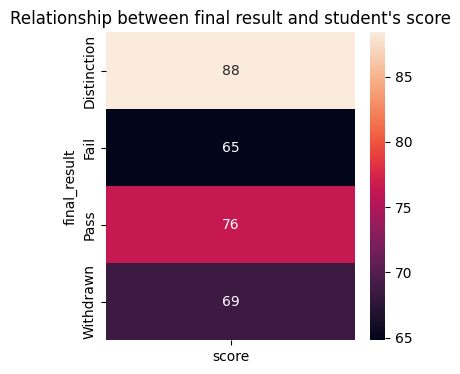

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(gb1,annot= True)
plt.title("Relationship between final result and student's score")
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(gb2,annot= True)
plt.title("Relationship between assessment ype and student's score")
plt.show()

In [ ]:
gb3=df_merge4.groupby("assessment_type").agg({"score":'mean'})
print(gb3)

                     score
assessment_type           
CMA              81.027053
Exam             65.572898
TMA              72.435850


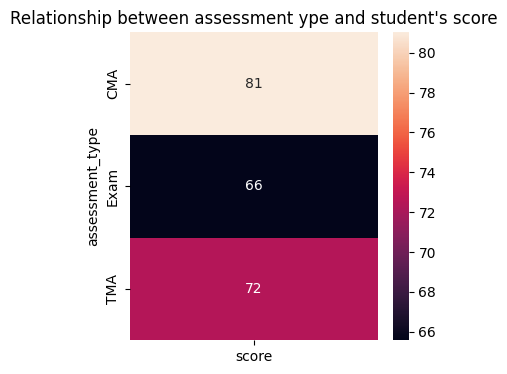

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(gb3,annot= True)
plt.title("Relationship between assessment ype and student's score")
plt.show()

In [ ]:
gb4=df_merge5.groupby("final_result").agg({"score":'mean'})
print(gb4)

                  score
final_result           
Distinction   88.682947
Fail          64.532952
Pass          76.746126
Withdrawn     65.721573


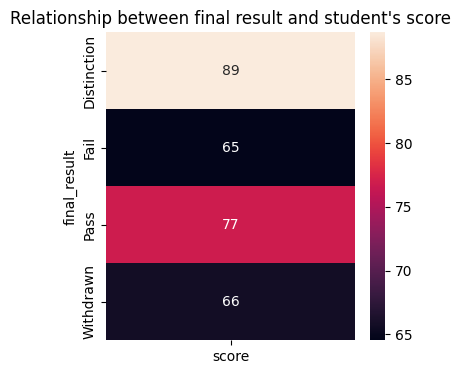

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(gb4,annot= True)
plt.title("Relationship between final result and student's score")
plt.show()

In [ ]:
gb5=df_merge5.groupby("disability").agg({"score":'mean'})
print(gb5)

                score
disability           
N           75.939159
Y           73.477084


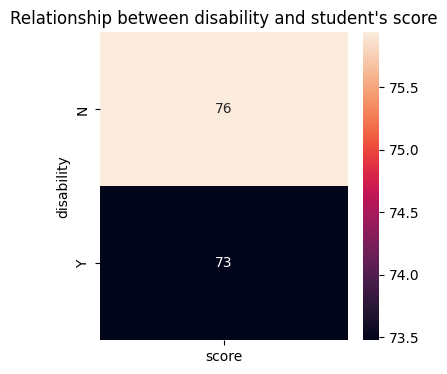

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(gb5,annot= True)
plt.title("Relationship between disability and student's score")
plt.show()

Text(0, 0.5, 'total')

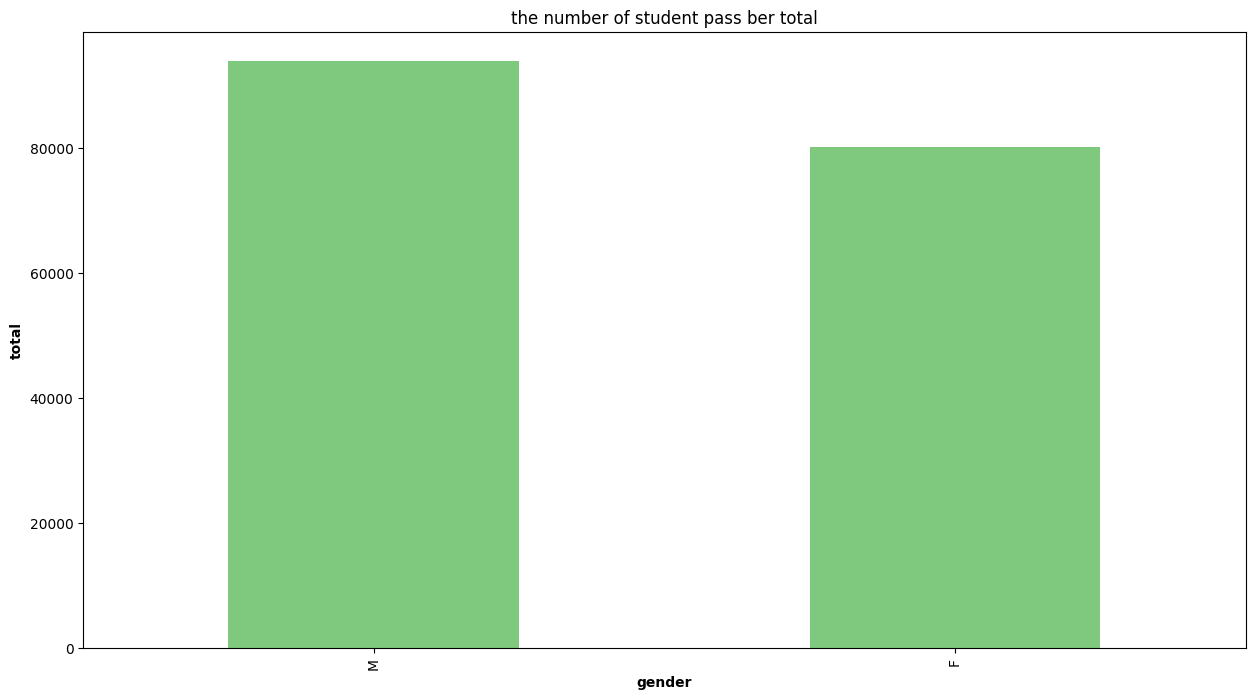

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]
ax = df_merge5['gender'].value_counts().plot(kind='bar', colormap = 'Accent')
ax.title.set_text('the number of student pass ber total')
plt.xlabel("gender",fontweight = 'bold')
plt.ylabel("total",fontweight = 'bold')

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming you have a list of colors for labels and bars
custom_colors = ['#FF5733', '#33FF57', '#5733FF', '#33FFFF', '#FFFF33', '#FF33FF', '#3366FF', '#33FFCC', '#FF6633', '#33CCFF']

# Assuming df_merge5 is your DataFrame
# Check the data type of the 'score' column and convert it to numeric if needed
df_merge5['score'] = pd.to_numeric(df_merge5['score'], errors='coerce')

# Check if there are any NaN values after the conversion
if df_merge5['score'].isna().any():
    print("There are missing or non-numeric values in the 'score' column. Please check your data.")

# Group by 'gender' and calculate the mean score
gb4 = df_merge5.groupby("gender").agg({"score": 'mean'})
df_top10 = pd.DataFrame(gb4).reset_index()

# Create the histogram
fig3 = px.histogram(
    df_top10,
    x='gender',
    y='score',
    color_discrete_sequence=custom_colors,
    labels={'score': 'mean', 'gender': 'gender'},
    title=('Mean Score')
)

# Update layout
fig3.update_layout(
    title={'xanchor': 'center', 'x': 0.5, 'font': {'color': 'black'}},
    yaxis_title='Number',
    plot_bgcolor='black',
    paper_bgcolor="white",
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
)

# Show the plot
fig3.show()



In [ ]:
import plotly.express as px
import pandas as pd

# Assuming you have a list of colors for labels and bars
custom_colors = ['#FF5733', '#33FF57', '#5733FF', '#33FFFF', '#FFFF33', '#FF33FF', '#3366FF', '#33FFCC', '#FF6633', '#33CCFF']

# Assuming df_merge5 is your DataFrame
# Check the data type of the 'score' column and convert it to numeric if needed
df_merge5['score'] = pd.to_numeric(df_merge5['score'], errors='coerce')

# Check if there are any NaN values after the conversion
if df_merge5['score'].isna().any():
    print("There are missing or non-numeric values in the 'score' column. Please check your data.")

# Group by 'gender' and calculate the mean score
gb4 = df_merge5.groupby("gender").agg({"score": 'mean'}).reset_index()

# Create the bar chart
fig = px.bar(
    gb4,
    x='gender',
    y='score',
    color='gender',
    color_discrete_sequence=custom_colors,
    labels={'score': 'Mean Score', 'gender': 'Gender'},
    title='Mean Score Grouped by Gender'
)

# Update layout
fig.update_layout(
    title={'xanchor': 'center', 'x': 0.5, 'font': {'color': 'black'}},
    yaxis_title='Mean Score',
    plot_bgcolor='white',
    paper_bgcolor="white",
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming you have a list of colors for labels and bars
custom_colors = ['#FF5733', '#33FF57', '#5733FF', '#33FFFF', '#FFFF33', '#FF33FF', '#3366FF', '#33FFCC', '#FF6633', '#33CCFF']

# Assuming df_merge5 is your DataFrame
# Check the data type of the 'score' column and convert it to numeric if needed
df_merge5['score'] = pd.to_numeric(df_merge5['score'], errors='coerce')

# Check if there are any NaN values after the conversion
if df_merge5['score'].isna().any():
    print("There are missing or non-numeric values in the 'score' column. Please check your data.")

# Group by 'gender' and calculate the mean score
gb4 = df_merge5.groupby("gender").agg({"score": 'mean'  }).reset_index()

# Create the bar chart
fig = px.bar(
    gb4,
    x='gender',
    y='score',
    color='gender',
    color_discrete_sequence=custom_colors,
    labels={'score': 'Mean Score', 'gender': 'Gender' },
    title='Mean Score Grouped by Gender'
)

# Update layout
fig.update_layout(
    title={'xanchor': 'center', 'x': 0.5, 'font': {'color': 'black'}},
    yaxis_title='Mean Score',
    plot_bgcolor='white',
    paper_bgcolor="white",
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
)

# Show the plot
fig.show()


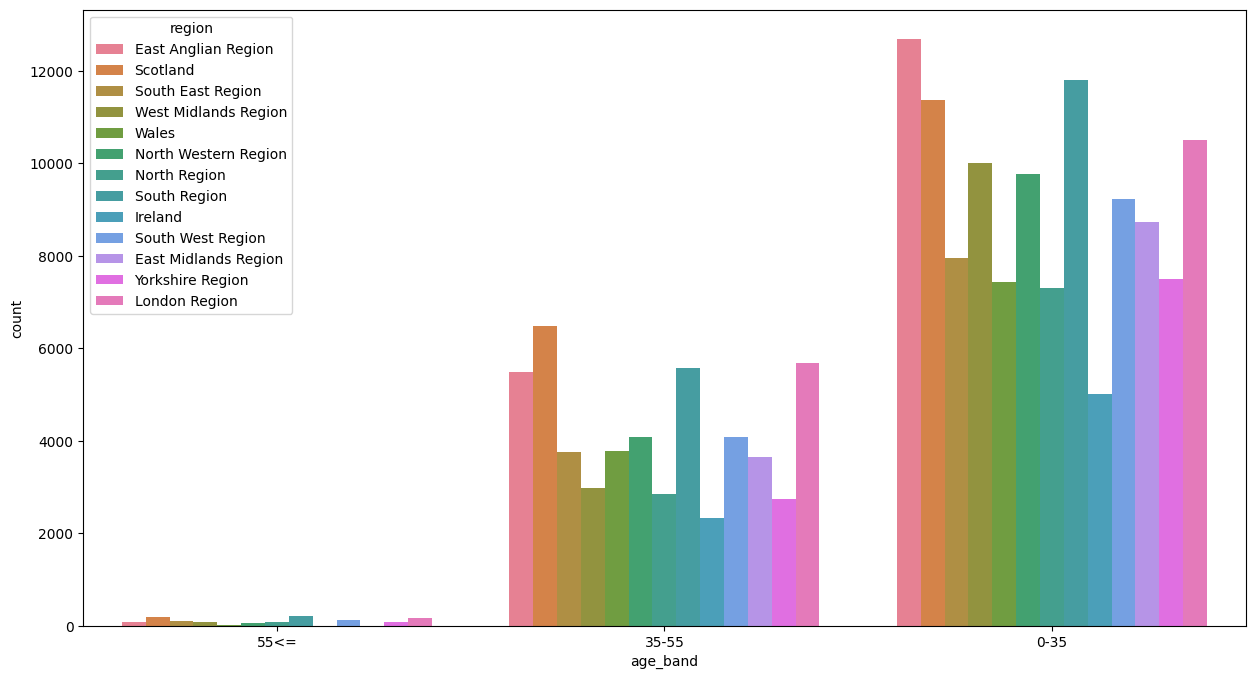

In [ ]:
import seaborn as sns
d = sns.countplot(data=df_merge5, x="age_band", hue="region")
#gb4 = df_merge5.groupby(d).agg({"score": 'mean'  })

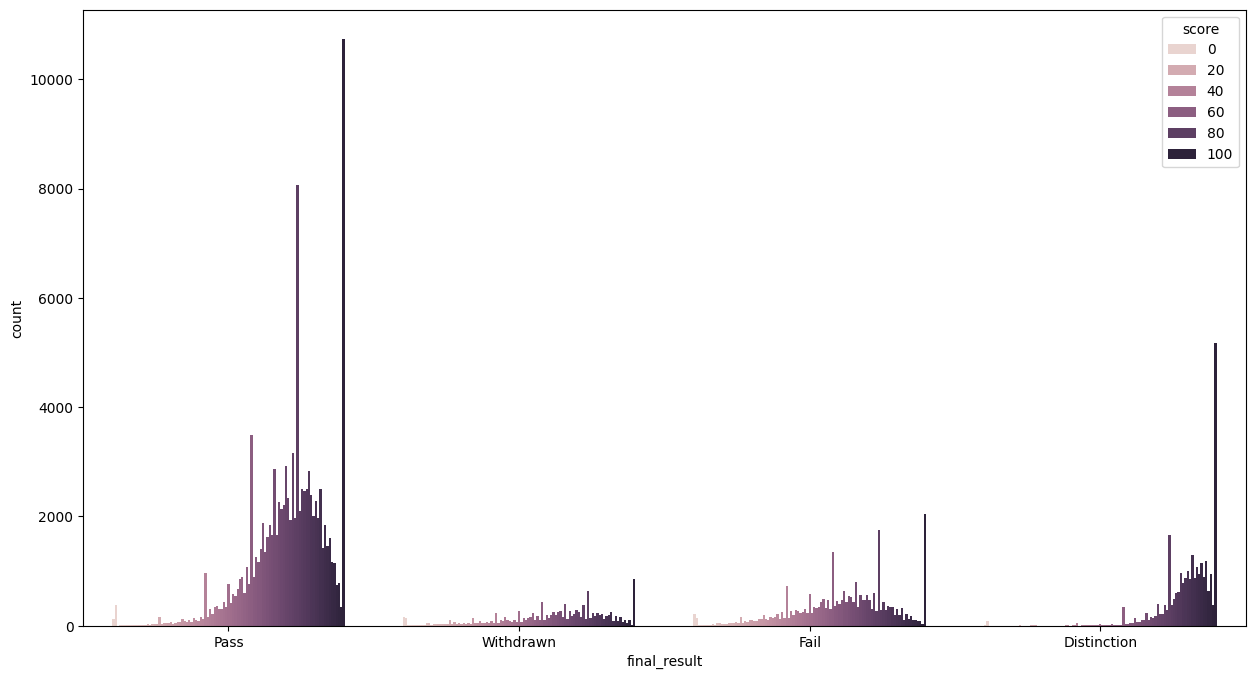

In [ ]:
import seaborn as sns
d = sns.countplot(data=df_merge5, x="final_result", hue="score")

In [ ]:
#highest_education
#import seaborn as sns
#sns.countplot(data=df_merge4, x="highest_education", hue="date_registration")

In [ ]:
#plt.rcParams['figure.figsize'] = [15,8]
#gb4=df_merge5.groupby("highest_education").agg({"score":'mean'}).reset_index()
#ax = df_merge5['gender',gb4].value_counts().plot(kind='bar', colormap = 'Accent')
#ax.title.set_text('the number of student pass ber total')
#plt.xlabel("gender",fontweight = 'bold')
#plt.ylabel("total",fontweight = 'bold')

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#import numpy as np
# Assuming df_merge5 is your DataFrame
# Replace 'your_column_names' with the actual column names in your DataFrame
#grouped_df = df_merge5.groupby(['age_band', 'region']).agg({"score": 'mean'}).size().reset_index(name='count')

# Create the countplot using the grouped DataFrame
#sns.barplot(data=grouped_df, x='age_band', y='count', hue='region')

# Show the plot
#plt.show()


In [ ]:
groupeddata3 = df_merge5.groupby("highest_education").agg({"score":'mean'})
print(groupeddata3)

                                 score
highest_education                     
A Level or Equivalent        76.227209
HE Qualification             77.810858
Lower Than A Level           74.057001
No Formal quals              70.618299
Post Graduate Qualification  83.453850


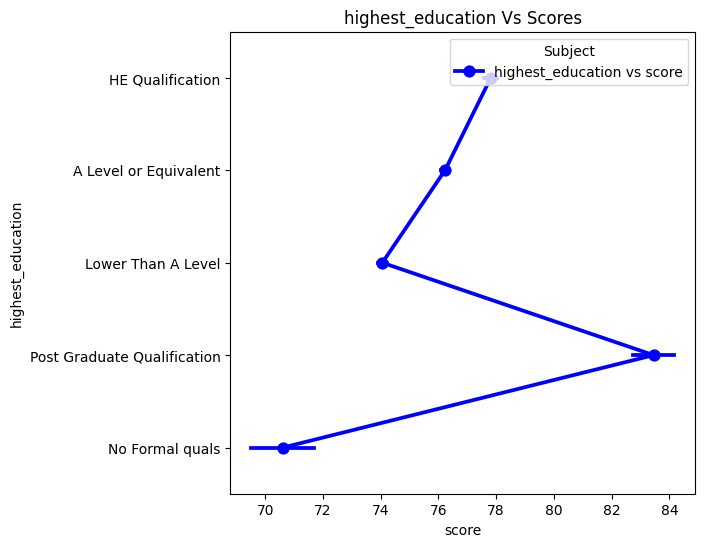

In [ ]:
plt.figure(figsize=(6, 6))
sns.pointplot(x="score", y="highest_education", data=df_merge5, color="blue", label="highest_education vs score")
plt.title("highest_education Vs Scores")
plt.xlabel("score")
plt.ylabel("highest_education")
plt.legend(title="Subject", loc="upper right")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming you have a list of colors for labels and bars
custom_colors = ['#FF5733', '#33FF57', '#5733FF', '#33FFFF', '#FFFF33', '#FF33FF', '#3366FF', '#33FFCC', '#FF6633', '#33CCFF']

# Assuming df_merge5 is your DataFrame
# Check the data type of the 'score' column and convert it to numeric if needed
df_merge5['score'] = pd.to_numeric(df_merge5['score'], errors='coerce')

# Check if there are any NaN values after the conversion
if df_merge5['score'].isna().any():
    print("There are missing or non-numeric values in the 'score' column. Please check your data.")

# Group by 'gender' and calculate the mean score
gb4 = df_merge5.groupby("disability").agg({"score": 'mean'}).reset_index()

# Create the bar chart
fig = px.bar(
    gb4,
    x='disability',
    y='score',
    color='disability',
    color_discrete_sequence=custom_colors,
    labels={'score': 'Mean Score', 'disability': 'disability'},
    title='Mean Score Grouped by disability'
)

# Update layout
fig.update_layout(
    title={'xanchor': 'center', 'x': 0.5, 'font': {'color': 'black'}},
    yaxis_title='Mean Score',
    plot_bgcolor='white',
    paper_bgcolor="white",
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
)

# Show the plot
fig.show()


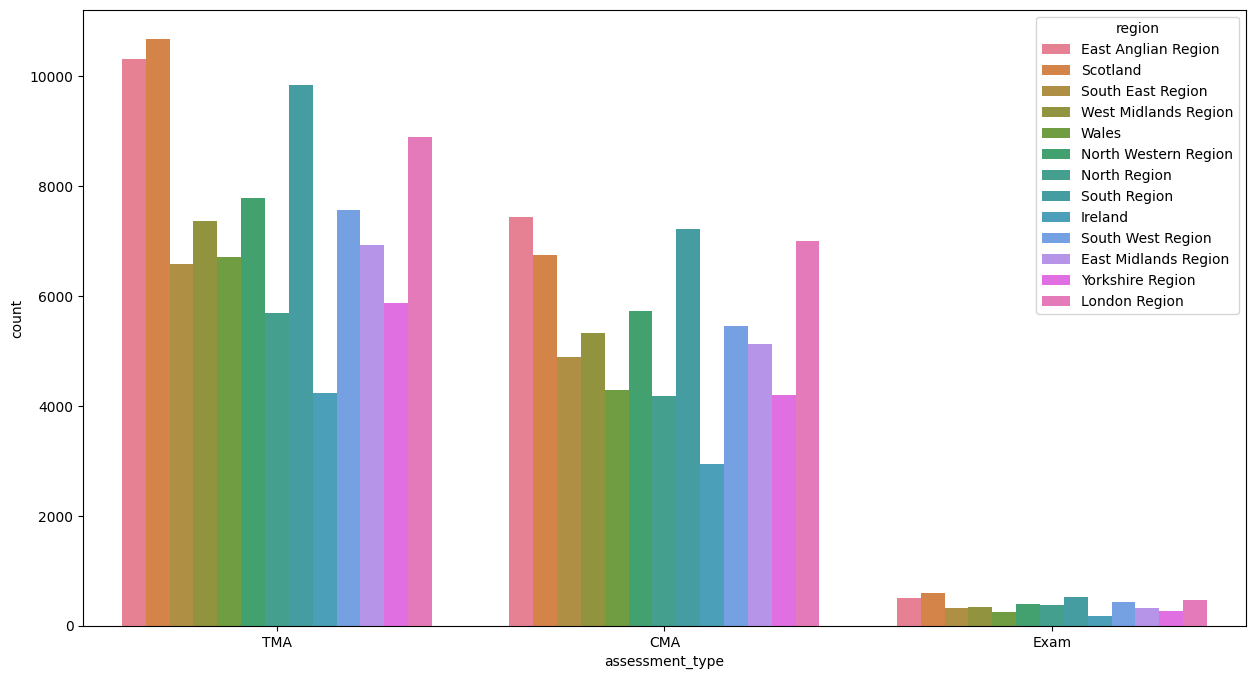

In [ ]:
import seaborn as sns
d = sns.countplot(data=df_merge5, x="assessment_type", hue="region")

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming you have a list of colors for labels and bars
custom_colors = ['#FF5733', '#33FF57', '#5733FF', '#33FFFF', '#FFFF33', '#FF33FF', '#3366FF', '#33FFCC', '#FF6633', '#33CCFF']

# Assuming df_merge5 is your DataFrame
# Check the data type of the 'score' column and convert it to numeric if needed
df_merge5['score'] = pd.to_numeric(df_merge5['score'], errors='coerce')

# Check if there are any NaN values after the conversion
if df_merge5['score'].isna().any():
    print("There are missing or non-numeric values in the 'score' column. Please check your data.")

# Group by 'gender' and calculate the mean score
gb4 = df_merge5.groupby("region").agg({"score": 'mean'}).reset_index()

# Create the bar chart
fig = px.bar(
    gb4,
    x='region',
    y='score',
    color='region',
    color_discrete_sequence=custom_colors,
    labels={'score': 'Mean Score', 'region': 'region'},
    title='Mean Score Grouped by region'
)

# Update layout
fig.update_layout(
    title={'xanchor': 'center', 'x': 0.5, 'font': {'color': 'black'}},
    yaxis_title='Mean Score',
    plot_bgcolor='white',
    paper_bgcolor="white",
    xaxis=dict(tickfont=dict(color='black')),
    yaxis=dict(tickfont=dict(color='black')),
)

In [ ]:
groupeddata4 = df_merge5.groupby("highest_education").agg({"score":'mean'})
print(groupeddata4)

                                 score
highest_education                     
A Level or Equivalent        76.227209
HE Qualification             77.810858
Lower Than A Level           74.057001
No Formal quals              70.618299
Post Graduate Qualification  83.453850


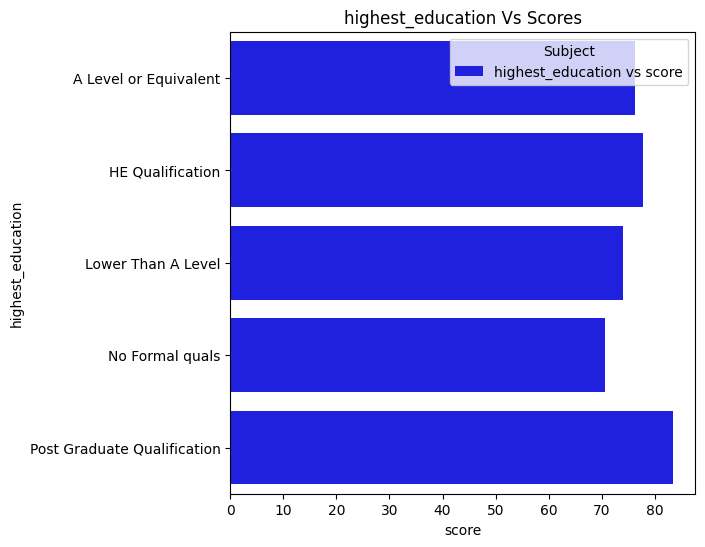

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x="score", y="highest_education", data=groupeddata4, color="blue", label="highest_education vs score")
plt.title("highest_education Vs Scores")
plt.xlabel("score")
plt.ylabel("highest_education")
plt.legend(title="Subject", loc="upper right")
plt.show()

In [ ]:
groupeddata5 = df_merge4.groupby("assessment_type").agg({"score":'mean'})
print(groupeddata5)

                     score
assessment_type           
CMA              81.027053
Exam             65.572898
TMA              72.435850


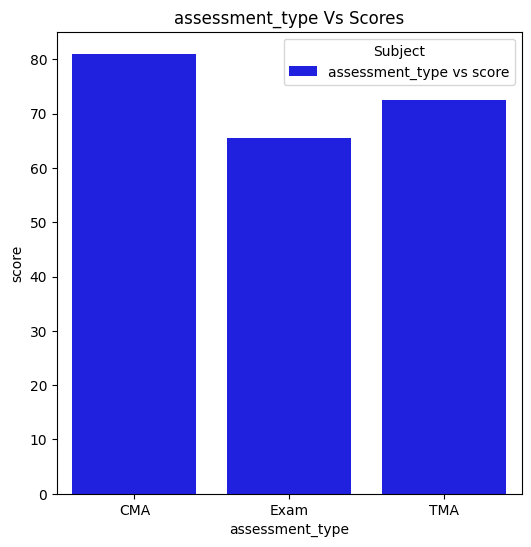

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x="assessment_type", y="score", data=groupeddata5, color="blue", label="assessment_type vs score")
plt.title("assessment_type Vs Scores")
plt.xlabel("assessment_type")
plt.ylabel("score")
plt.legend(title="Subject", loc="upper right")
plt.show()

In [ ]:
#import seaborn as sns
#sns.countplot(data=df_merge4, x="id_student", hue="date_registration")

In [ ]:
groupeddata6 = df_merge5.groupby(['final_result', 'region']).agg({"gender":'count'})
print(groupeddata6)

                                   gender
final_result region                      
Distinction  East Anglian Region     2843
             East Midlands Region    1738
             Ireland                  851
             London Region           2373
             North Region            2038
             North Western Region    1869
             Scotland                2661
             South East Region       2161
             South Region            2904
             South West Region       2328
             Wales                   1553
             West Midlands Region    1578
             Yorkshire Region        1433
Fail         East Anglian Region     3010
             East Midlands Region    2013
             Ireland                 1230
             London Region           3197
             North Region            1265
             North Western Region    2758
             Scotland                2936
             South East Region       1498
             South Region         

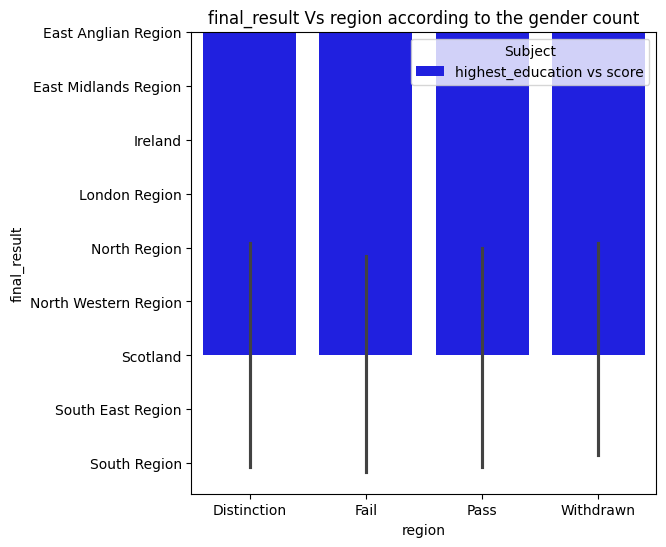

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x="final_result", y="region", data=groupeddata6, color="blue", label="highest_education vs score")
plt.title("final_result Vs region according to the gender count")
plt.xlabel("region")
plt.ylabel("final_result")
plt.legend(title="Subject", loc="upper right")
plt.show()

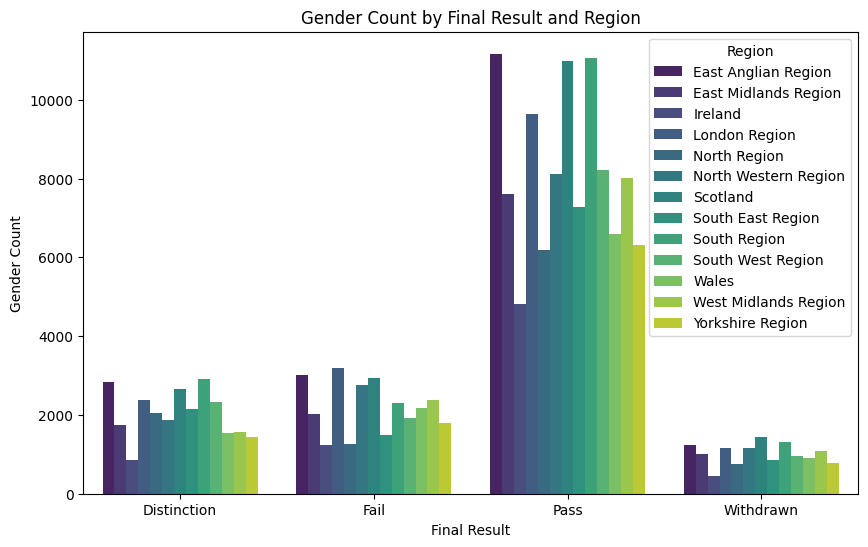

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="final_result", y="gender", hue="region", data=groupeddata6.reset_index(), palette="viridis")
plt.title("Gender Count by Final Result and Region")
plt.xlabel("Final Result")
plt.ylabel("Gender Count")
plt.legend(title="Region", loc="upper right")
plt.show()

In [ ]:
groupeddata7 = df_merge5.groupby(['final_result', 'gender']).agg({"region":'count'})
print(groupeddata7)

                     region
final_result gender        
Distinction  F        12395
             M        13935
Fail         F        12931
             M        15535
Pass         F        48925
             M        57096
Withdrawn    F         5790
             M         7305


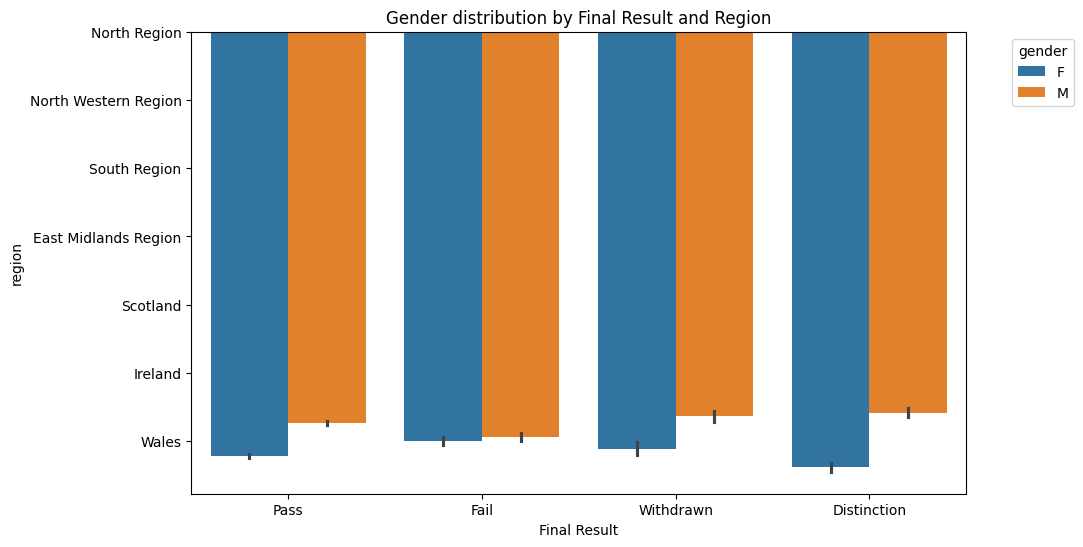

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="final_result", y="region", hue="gender", data=df_merge5)
plt.title("Gender distribution by Final Result and Region")
plt.xlabel("Final Result")
plt.ylabel("region")
plt.legend(title="gender", bbox_to_anchor=(1.05,1) , loc='upper left')
plt.show()

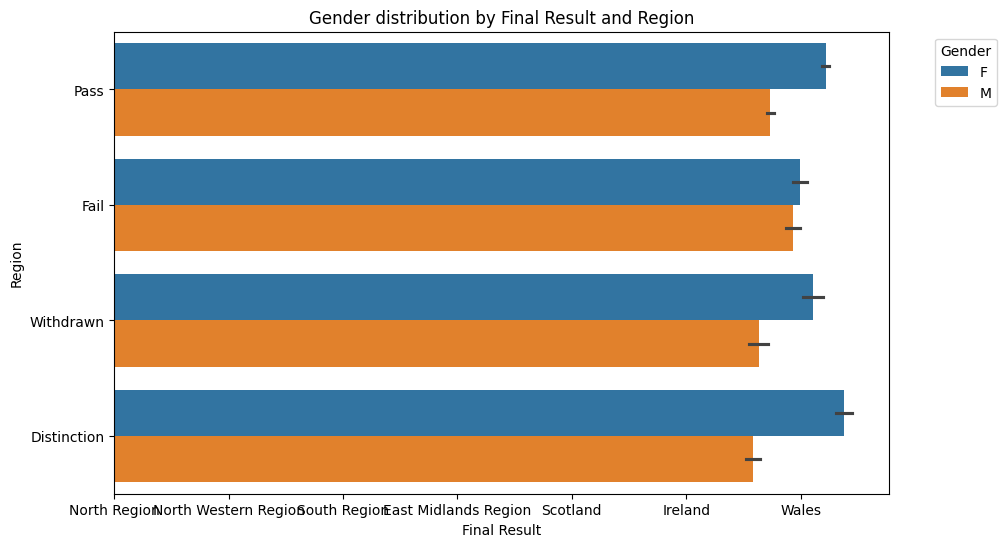

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="region", y="final_result", hue="gender", data=df_merge5, order=df_merge5['final_result'].unique(), orient="h")
plt.title("Gender distribution by Final Result and Region")
plt.xlabel("Final Result")
plt.ylabel("Region")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


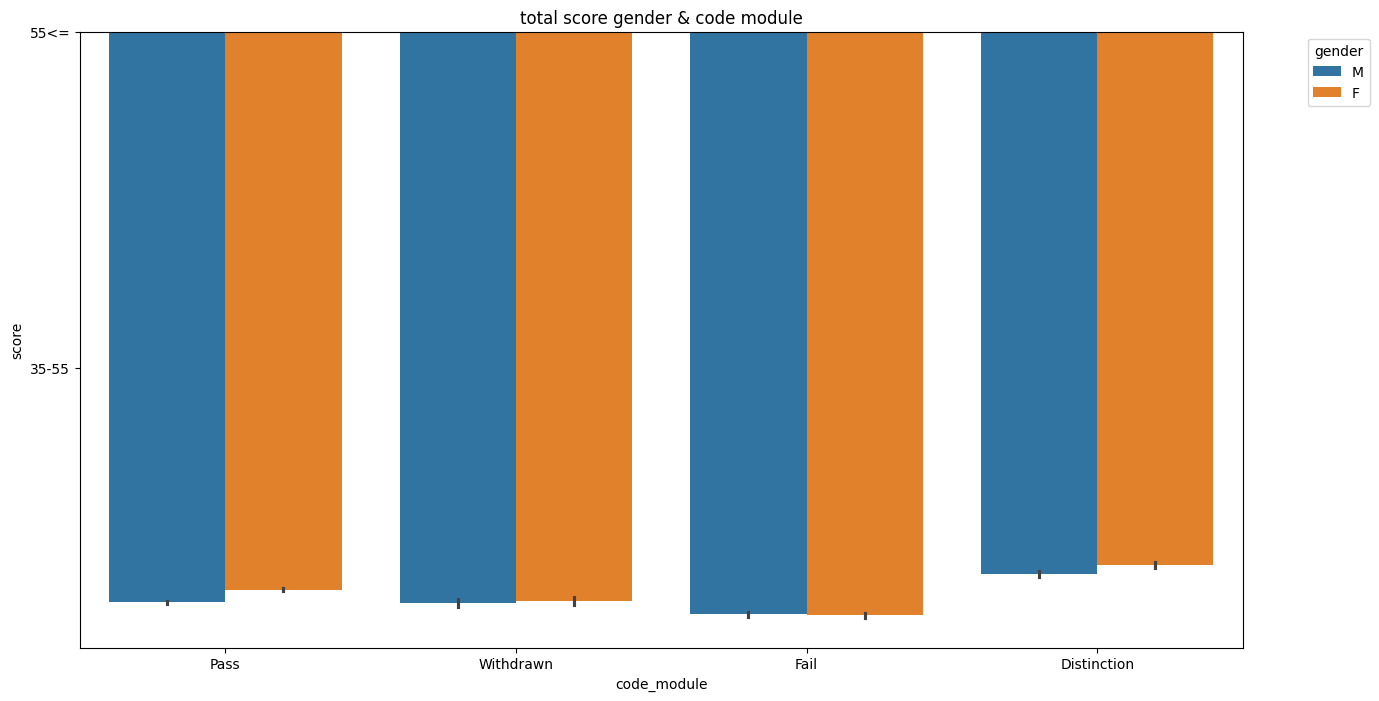

In [ ]:
ax = sns.barplot(x='final_result', y='age_band', hue='gender', data=df_merge5)
ax.legend(title='gender' , bbox_to_anchor=(1.05,1) , loc='upper left')
plt.title('total score gender & code module')
plt.xlabel('code_module')
plt.ylabel('score')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'gender' is a column in your original DataFrame df_merge5
groupeddata6 = df_merge5.groupby(['final_result', 'region', 'gender']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="region", y="count", hue="final_result", data=groupeddata6, palette="muted")
plt.title("Count of Male and Female Students Passing/Failing in Each Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

In [ ]:
dff = df_merge5.copy()

In [ ]:
dff

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_submitted,is_banked,score,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,1752,TMA,19,10.0,268,11391,18,0,78,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,1753,TMA,54,20.0,268,11391,53,0,85,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
2,AAA,2013J,1754,TMA,117,20.0,268,11391,115,0,80,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
3,AAA,2013J,1755,TMA,166,20.0,268,11391,164,0,85,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
4,AAA,2013J,1756,TMA,215,30.0,268,11391,212,0,82,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37435,TMA,61,0.0,269,541774,60,0,56,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
173908,GGG,2014J,37436,TMA,124,0.0,269,541774,124,0,68,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
173909,GGG,2014J,37435,TMA,61,0.0,269,547334,59,0,54,F,East Anglian Region,HE Qualification,70-80%,35-55,0,30,N,Fail
173910,GGG,2014J,37436,TMA,124,0.0,269,627809,124,0,60,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,30,N,Fail


In [ ]:
dff['age_band'].unique()

array(['55<=', '35-55', '0-35'], dtype=object)

In [ ]:
dff['age_band'] = dff['age_band'].replace('0-35', 1)
dff['age_band'] = dff['age_band'].replace('35-55', 2)
dff['age_band'] = dff['age_band'].replace('55<=', 3)

In [ ]:
dff['age_band'].unique()

array([3, 2, 1])

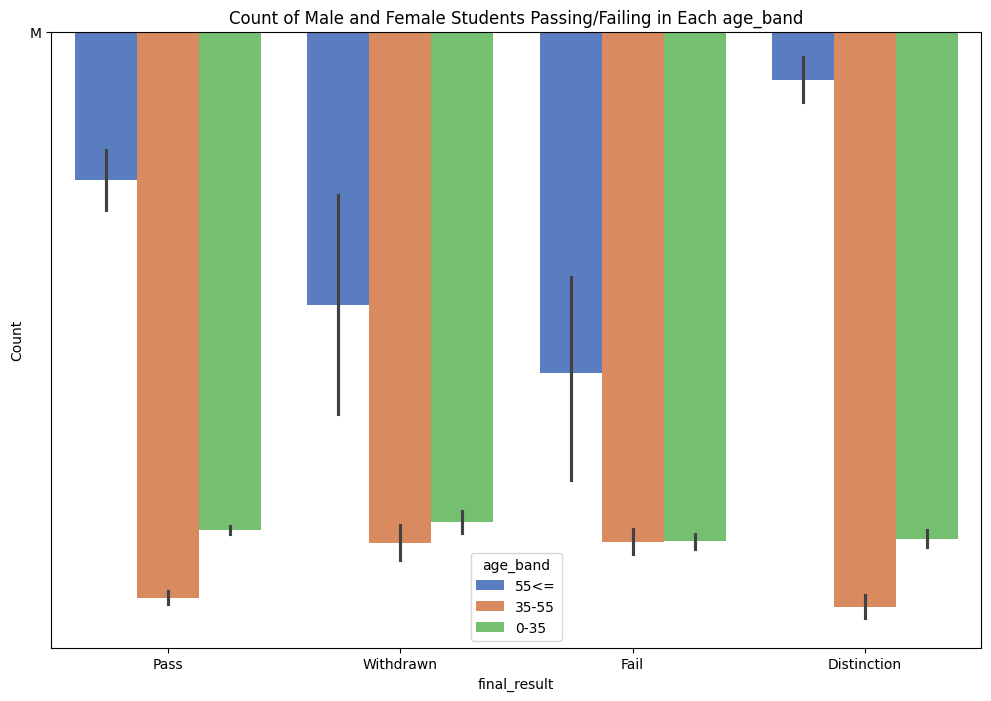

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'gender' is a column in your original DataFrame df_merge5
groupeddata6 = df_merge5.groupby(['final_result', 'region', 'gender']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="final_result", y="gender", hue="age_band", data=df_merge5, palette="muted")
plt.title("Count of Male and Female Students Passing/Failing in Each age_band")
plt.xlabel("final_result")
plt.ylabel("Count")
plt.show()

In [ ]:
groupeddata8 = df_merge5.groupby(['final_result', 'age_band']).agg({"gender":'count'})
print(groupeddata8)

                       gender
final_result age_band        
Distinction  0-35       16151
             35-55       9876
             55<=         303
Fail         0-35       21033
             35-55       7328
             55<=         105
Pass         0-35       72890
             35-55      32461
             55<=         670
Withdrawn    0-35        9226
             35-55       3787
             55<=          82


In [ ]:
df_count = df_merge5.copy()
df_count['gender'] = df_count['gender'].replace('M', 0)
df_count['gender'] = df_count['gender'].replace('F', 1)

In [ ]:
df_count['gender'].unique()

array([0, 1])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="final_result", y="age_band", hue="gender", data=df_count, palette="muted")

plt.title("Count of Male and Female Students Passing/Failing in Each Age Band")
plt.xlabel("Final Result")
plt.ylabel("Count")
plt.show()

NameError: name 'df_count' is not defined

<Figure size 1200x800 with 0 Axes>

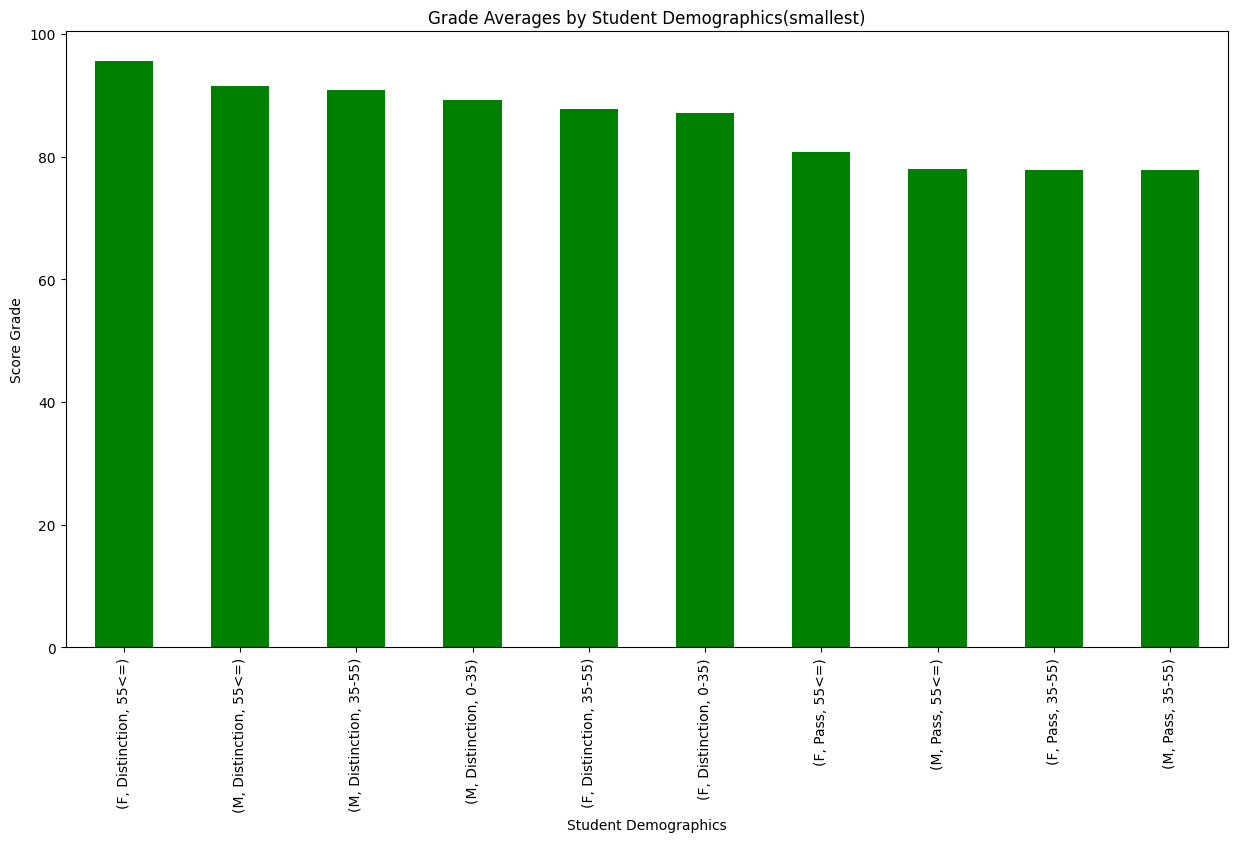

In [ ]:
grade_avg_by_student = df_merge5.groupby(['gender', 'final_result', 'age_band'])['score'].mean()
grade_avg_by_student = grade_avg_by_student.nlargest(10)
grade_avg_by_student.plot(kind='bar', color='green')
plt.title('Grade Averages by Student Demographics(largest)')
plt.xlabel('Student Demographics')
plt.ylabel('Score Grade')
plt.show()

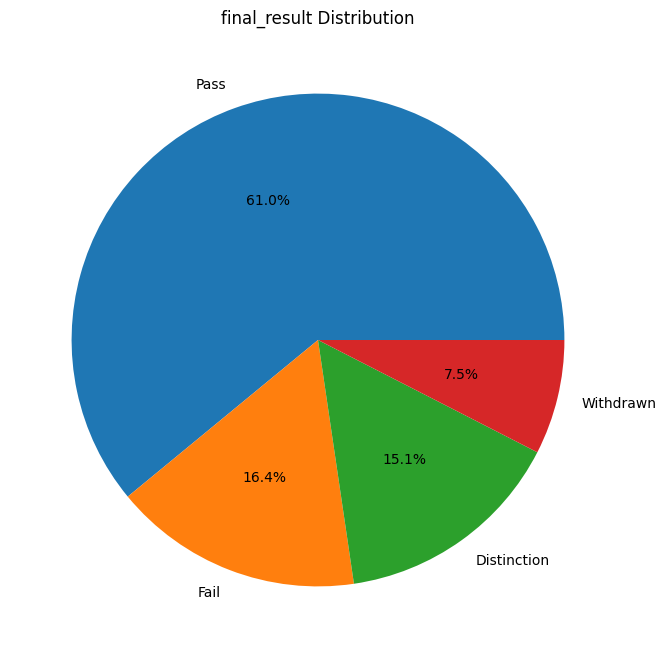

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df_merge5['final_result'].value_counts(), labels=df_merge5['final_result'].value_counts().index, autopct='%1.1f%%')
plt.title('final_result Distribution')
plt.show()